(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 9 Text major ticklabel objects>)

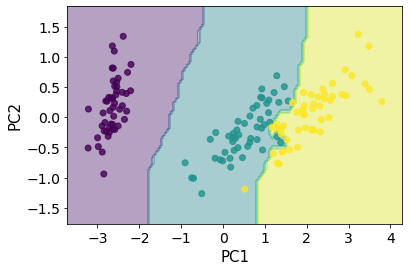

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np

# import some data to play with
iris = datasets.load_iris()
y = iris.target

X_reduced = PCA(n_components=2).fit_transform(iris.data)

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_reduced, y)

x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.8)
plt.xlabel("PC1",fontsize=15)
plt.ylabel("PC2",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)